In [37]:
import pandas as pd
import numpy as np
import os
import matplotlib.patheffects as PathEffects
shadow = [PathEffects.withStroke(linewidth=3, foreground="w")]

df = pd.read_csv("csvs/dataICdistribution.csv", index_col=0)

In [38]:
from collections import OrderedDict
import rebound
import reboundx
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import sys

from ic import output, initialize, plotsa, integrate, plot
path = '/scratch/dtamayo/selectic/data/'
planets = ['b', 'c', 'd', 'e', 'f', 'g', 'h']
resonances = OrderedDict([(('b','c'),(8,5)),(('c','d'),(5,3)),(('d','e'),(3,2)),(('e','f'),(3,2)),(('f','g'),(4,3)),(('g','h'),(3,2))]) # ordered so we add planets in right sequence
threebodyresonances = OrderedDict([(('b','c','d'),(2,3)),(('c','d','e'),(1,2)),(('d','e','f'),(2,3)),(('e','f','g'),(1,2)),(('f','g','h'),(1,1))])
outputs = initialize(planets, resonances, threebodyresonances)

In [39]:
df['max3MMRlibampf'] = df[['phi3bodylibampfbcd', 'phi3bodylibampfcde', 'phi3bodylibampfdef', 'phi3bodylibampfefg', 'phi3bodylibampffgh']].max(axis=1)
df['max3MMRlibamp1'] = df[['phi3bodylibamp1bcd', 'phi3bodylibamp1cde', 'phi3bodylibamp1def', 'phi3bodylibamp1efg', 'phi3bodylibamp1fgh']].max(axis=1)
df['max1storder3MMRlibampf'] = df[['phi3bodylibampfdef', 'phi3bodylibampfefg', 'phi3bodylibampffgh']].max(axis=1)
df['max1storder3MMRlibamp1'] = df[['phi3bodylibamp1def', 'phi3bodylibamp1efg', 'phi3bodylibamp1fgh']].max(axis=1)
df['maxerms1'] = df[['erms1b', 'erms1c', 'erms1d', 'erms1e', 'erms1f', 'erms1g', 'erms1h']].max(axis=1)
df['maxermsf'] = df[['ermsfb', 'ermsfc', 'ermsfd', 'ermsfe', 'ermsff', 'ermsfg', 'ermsfh']].max(axis=1)
df['max2MMRlibampf'] = df[['phi2bodylibampfbc', 'phi2bodylibampfcd', 'phi2bodylibampfde', 'phi2bodylibampfef', 'phi2bodylibampffg', 'phi2bodylibampfgh']].max(axis=1)
df['max2MMRlibamp1'] = df[['phi2bodylibamp1bc', 'phi2bodylibamp1cd', 'phi2bodylibamp1de', 'phi2bodylibamp1ef', 'phi2bodylibamp1fg', 'phi2bodylibamp1gh']].max(axis=1)
df['max1storder2MMRlibampf'] = df[['phi2bodylibampfde', 'phi2bodylibampfef', 'phi2bodylibampffg', 'phi2bodylibampfgh']].max(axis=1)
df['max1storder2MMRlibamp1'] = df[['phi2bodylibamp1de', 'phi2bodylibamp1ef', 'phi2bodylibamp1fg', 'phi2bodylibamp1gh']].max(axis=1)

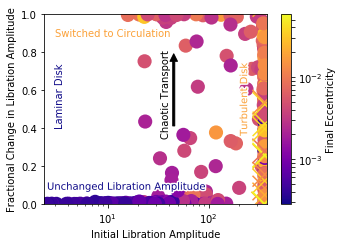

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
#plt.style.use('paper')

fig, ax = plt.subplots(figsize=(5,3.5))
cm = plt.cm.get_cmap('plasma')
ax.set_xscale('log')

vmin = df['maxermsf'].min()
vmax = df['maxermsf'].max()

dfstable = df[df['Eerrf']<1.e-2]
sc = ax.scatter(dfstable['max3MMRlibamp1'], np.abs(dfstable['max3MMRlibampf']-dfstable['max3MMRlibamp1'])/(360-dfstable['max3MMRlibamp1']), c=dfstable['maxermsf'], edgecolor='', s=200,cmap=cm, vmin=vmin, vmax=vmax, norm=mpl.colors.LogNorm())  
dfunstable = df[df['Eerrf']>1.e-2]
ax.scatter(dfunstable['max3MMRlibamp1'], np.abs(dfunstable['max3MMRlibampf']-dfunstable['max3MMRlibamp1'])/(360-dfunstable['max3MMRlibamp1']), c=dfunstable['maxermsf'], edgecolor='', s=600,cmap=cm, marker='x', vmin=vmin, vmax=vmax, norm=mpl.colors.LogNorm())  

ax.set_xlim([0,380])
ax.set_ylim([0,1])
ax.set_xlabel('Initial Libration Amplitude')
ax.set_ylabel('Fractional Change in Libration Amplitude')
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel('Final Eccentricity')
ax.text(3, 0.7, 'Laminar Disk', rotation='vertical', color=cm(0))
ax.text(200, 0.7, 'Turbulent Disk', rotation='vertical', color=cm(200), path_effects=shadow)
ax.text(3., 0.88, 'Switched to Circulation', color=cm(200))
ax.text(2.5, 0.075, 'Unchanged Libration Amplitude', color=cm(0), path_effects=shadow)

opt = dict(color='k', arrowstyle = 'simple,head_width=.75,head_length=.75', connectionstyle = 'arc3,rad=0')
ax.annotate('',xy=(45,0.8),xycoords='data',xytext =(45,0.4),textcoords = 'data',arrowprops=opt)
ax.text(34, 0.77, 'Chaotic Transport', rotation='vertical', color='black')
fig.savefig('evolution.pdf', bbox_inches='tight')